This script is intended to clean the data of the Mexican social indicators.

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import math Library
import math 




In [153]:
%cd 'Documents/GitHub/pmx_gasoline_theft_prediction/'

/Users/jorgeroa/Documents/GitHub/pmx_gasoline_theft_prediction


In [132]:
df_social_2015_ori = pd.read_excel("data-raw/IRS_2015.xlsx")
df_social_2020_ori = pd.read_excel("data-raw/IRS_2020.xlsx")

In [67]:
df_social_2015_ori

df_social_2020_ori[(df_social_2020_ori['IRS'].isna())]



,CVEGEO,POB_TOT,SBASC,POB_6_16_NEB,POB_16_EBI,NO_SS,OVPT,NO_SANIT,OVSAE,NO_DREN,NO_ELECT,NO_LAVA,No_REFRI,IRS,grade


In [45]:
df_social_2020_ori

,CVEGEO,POB_TOT,SBASC,POB_6_16_NEB,POB_16_EBI,NO_SS,OVPT,NO_SANIT,OVSAE,NO_DREN,NO_ELECT,NO_LAVA,No_REFRI,IRS,grade,place
0,1001,948990,1.642183,4.601069,20.252928,18.250877,0.574092,0.272787,0.371096,0.299428,0.164348,12.125340,4.333453,-1.315320,Muy bajo,2435
1,1002,51536,3.523404,6.294853,33.869504,14.727569,1.469414,3.825268,0.990257,3.569717,0.758665,17.696854,11.587606,-0.857301,Muy bajo,1986
2,1003,58250,4.487288,6.948460,42.424388,20.312446,1.121134,0.715206,0.940722,0.663660,0.721649,12.628866,5.547680,-0.918554,Muy bajo,2076
3,1004,17000,3.139545,5.697637,27.595837,13.805882,1.017553,2.009667,0.788603,1.195625,0.635970,18.519461,10.506233,-1.004023,Muy bajo,2178
4,1005,129929,2.377387,5.877568,26.604873,21.010706,1.239034,0.584848,0.862199,0.780803,0.467276,12.007476,5.296795,-1.173361,Muy bajo,2347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2464,32054,19446,7.489290,4.534543,36.604957,15.473619,1.414141,4.161616,2.040404,5.919192,0.666667,19.656566,15.878788,-0.692240,Bajo,1768
2465,32055,31558,4.196878,5.288837,44.877591,25.163192,1.073959,3.011515,1.262179,3.974756,0.830381,11.625332,5.580159,-0.884952,Muy bajo,2020
2466,32056,149607,1.437077,3.669372,19.253869,16.944394,0.479090,0.535731,1.106863,0.429529,0.181724,10.738223,4.559615,-1.336926,Muy bajo,2444
2467,32057,20455,5.116885,5.658915,31.989578,13.840137,1.392459,4.584404,3.191945,4.284490,0.578406,20.651243,17.245073,-0.748505,Muy bajo,1841


In [133]:
#create a new dataframe, rename and drop some variables - 2015
df_social_2015 = df_social_2015_ori
#df_social_2015 = df_social_2015_ori.rename(columns = {'CVEGEO' : 'Mun_Code'})
df_social_2015.drop(['place'], axis = 1, inplace = True)
df_social_2015['CVEGEO'] = df_social_2015['CVEGEO'].astype(str).str.zfill(5)

print(df_social_2015.head())

#create a new dataframe, rename and drop some variables - 2015
df_social_2020 = df_social_2020_ori


#df_social_2020 = df_social_2020_ori.rename(columns = {'CVEGEO' : 'Mun_Code'})
df_social_2020.drop(['place'], axis = 1, inplace = True)
df_social_2020['CVEGEO'] = df_social_2020['CVEGEO'].astype(str).str.zfill(5)


df_social_2020.head()

  CVEGEO  POB_TOT   SBASC  POB_6_16_NEB  POB_16_EBI    NO_SS    OVPT  \
0  01001   877190  2.0570        3.4786     25.6873  14.1560  0.5478   
1  01002    46464  4.4207        2.5959     41.8921   5.5355  1.6779   
2  01003    56048  4.7805        4.3906     49.1856   9.7524  1.0577   
3  01004    15577  4.3233        2.6265     33.0597   5.1165  1.5629   
4  01005   120405  3.2445        4.1297     33.7271  13.8341  0.9201   

   NO_SANIT   OVSAE  NO_DREN  NO_ELECT  NO_LAVA  No_REFRI       IRS     grade  
0    0.5543  0.6627   0.4819    0.1999  13.8229    5.4216 -1.365841  Muy bajo  
1    5.6457  1.2979   5.9887    1.1681  23.4356   15.2220 -0.883915      Bajo  
2    0.7756  0.9519   0.8673    0.5429  15.5620    7.3826 -0.979457      Bajo  
3    2.8986  0.5968   1.9324    0.7389  23.0747   12.4467 -1.062688  Muy bajo  
4    1.0273  0.9443   0.7264    0.4220  15.5097    8.1976 -1.188620  Muy bajo  


,CVEGEO,POB_TOT,SBASC,POB_6_16_NEB,POB_16_EBI,NO_SS,OVPT,NO_SANIT,OVSAE,NO_DREN,NO_ELECT,NO_LAVA,No_REFRI,IRS,grade
0,01001,948990,1.642183,4.601069,20.252928,18.250877,0.574092,0.272787,0.371096,0.299428,0.164348,12.125340,4.333453,-1.315320,Muy bajo
1,01002,51536,3.523404,6.294853,33.869504,14.727569,1.469414,3.825268,0.990257,3.569717,0.758665,17.696854,11.587606,-0.857301,Muy bajo
2,01003,58250,4.487288,6.948460,42.424388,20.312446,1.121134,0.715206,0.940722,0.663660,0.721649,12.628866,5.547680,-0.918554,Muy bajo
3,01004,17000,3.139545,5.697637,27.595837,13.805882,1.017553,2.009667,0.788603,1.195625,0.635970,18.519461,10.506233,-1.004023,Muy bajo
4,01005,129929,2.377387,5.877568,26.604873,21.010706,1.239034,0.584848,0.862199,0.780803,0.467276,12.007476,5.296795,-1.173361,Muy bajo


In [16]:
# check if there is NAN or empty cells

#np.where(pd.isnull(df_social_2020))

#pd.isna(df_social_2020['ANALF'])
df_social_2020['ANALF'] == ''


0       False
1       False
2       False
3       False
4       False
        ...  
2464    False
2465    False
2466    False
2467    False
2468    False
Name: ANALF, Length: 2469, dtype: bool

In [79]:
#Join Databases 2015 and 2020 - TEST THE IF CASE

# df_social_2015_2020_2 = df_social_2020.join(df_social_2015.set_index('Mun_Code'), lsuffix='_S2020', rsuffix='_S2015', on = 'Mun_Code', how = 'left')

# social_indicators = ['ANALF', 'SBASC', 'OVSDE', 'OVSEE', 'OVSAE', 'OVPT', 'VHAC', 'PL.5000', 'PO2SM', 'IMN']

# # Loop over the joined dataframe to calculate to value to 2019 and the mean between 2015-2019
# for key in social_indicators:
#   if df_social_2015_2020_2[key+'_S2015'].isnull() { 
#       df_social_2015_2020_2[key+'_var_Anual'] = df_social_2015_2020_2[key+'_S2020'] / 5
#       df_social_2015_2020_2[key+'_S2019'] = df_social_2015_2020_2[key+'_var_Anual'] * 4
#       df_social_2015_2020_2[key+'_mean_15_19'] = (df_social_2015_2020_2[key+'_S2019']) /2
     
#   } else {
#       df_social_2015_2020_2[key+'_var_Anual'] = (df_social_2015_2020_2[key+'_S2020'].div(df_social_2015_2020_2[key+'_S2015'].values))**(1/5)
#       df_social_2015_2020_2[key+'_S2019'] = (df_social_2015_2020_2[key+'_S2015'] * ((df_social_2015_2020_2[key+'_var_Anual'])**4))
#       df_social_2015_2020_2[key+'_mean_15_19'] = (df_social_2015_2020_2[key+'_S2015'] + df_social_2015_2020_2[key+'_S2019']) /2
#   }
 
# # Generate a mean dataframe and rename the variables
# df_social_mean_2015_2019_2 = df_social_2015_2020_2[df_social_2015_2020_2.columns[df_social_2015_2020_2.columns.str.contains("_mean_15_19|Mun_Code")]]
# df_social_mean_2015_2019_2 = df_social_mean_2015_2019_2.rename(columns = {'ANALF_mean_15_19' : 'ANALF', 'SBASC_mean_15_19' : 'SBASC', 'OVSDE_mean_15_19' : 'OVSDE', 'OVSEE_mean_15_19' : 'OVSEE', 'OVSAE_mean_15_19' : 'OVSAE', 'OVPT_mean_15_19' : 'OVPT', 'VHAC_mean_15_19' : 'VHAC', 'PL.5000_mean_15_19' : 'PL.5000', 'PO2SM_mean_15_19' : 'PO2SM', 'IMN_mean_15_19' : 'IMN'})
# df_social_mean_2015_2019_2



In [182]:
#Join Databases 2015 and 2020

df_social_2015_2020 = df_social_2015.join(df_social_2020.set_index('CVEGEO'), lsuffix='_S2015', rsuffix='_S2020', on = 'CVEGEO', how = 'outer')

social_indicators = ["POB_TOT", "SBASC", "POB_6_16_NEB", "POB_16_EBI", "NO_SS", "OVPT", "NO_SANIT", "OVSAE", "NO_DREN", "NO_ELECT", "NO_LAVA", "No_REFRI", "IRS"]

# Loop over the joined dataframe to calculate to value to 2019 and the mean between 2015-2019
for key in social_indicators: 
      df_social_2015_2020[key+'_var_Anual'] = (df_social_2015_2020[key+'_S2020']/df_social_2015_2020[key+'_S2015'])**(1/5)
      df_social_2015_2020[key+'_S2019'] = (df_social_2015_2020[key+'_S2015'] * ((df_social_2015_2020[key+'_var_Anual'])**4))
      df_social_2015_2020[key+'_mean_15_19'] = (df_social_2015_2020[key+'_S2015'] + df_social_2015_2020[key+'_S2019']) /2
      df_social_2015_2020[key+'_mean_15_20'] = (df_social_2015_2020[key+'_S2015'] + df_social_2015_2020[key+'_S2020']) /2


df_social_2015_2020['IRS_mean_15_19'] = np.where(df_social_2015_2020['IRS_mean_15_19'].isna(), df_social_2015_2020['IRS_mean_15_20'], df_social_2015_2020['IRS_mean_15_19'])
# Generate a mean dataframe and rename the variables
df_social_mean_2015_2019 = df_social_2015_2020[df_social_2015_2020.columns[df_social_2015_2020.columns.str.contains("_mean_15_19|CVEGEO")]]

df_social_mean_2015_2019.columns = df_social_mean_2015_2019.columns.str.replace("_mean_15_19", "", regex=True)

df_social_mean_2015_2019["POB_TOT"] = df_social_mean_2015_2019["POB_TOT"].round()


/var/folders/q3/ztffc4r10tv5h4pftjr2qw0r0000gn/T/ipykernel_80655/395842126.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_social_mean_2015_2019["POB_TOT"] = df_social_mean_2015_2019["POB_TOT"].round()


In [57]:
#Check if we have NaN or empty cells

#for key in df_social_2015_2020[["OVSEE_S2015"]]:
#  if (df_social_2015_2020['OVSEE_S2015'].isnull() | df_social_2015_2020['OVSEE_S2015'] == '')

#df_social_2015_2020.loc[(df_social_2015_2020['OVSEE_S2015'].isnull() | df_social_2015_2020['OVSEE_S2015'] == ''), 'OVSEE_mean_15_19'] = df_social_2015_2020['OVSEE_S2020'] / 5 * 4


In [81]:
#df_social_mean_2015_2019.loc[df_social_mean_2015_2019.isnull()]
#df_social_mean_2015_2019.loc[df_social_mean_2015_2019['Mun_Code'] == "02006"].isnull()
#df_social_mean_2015_2019.loc[(df_social_mean_2015_2019['OVSEE'].isnull() | df_social_2015_2020['OVSEE'] == '')]
#print(df_social_mean_2015_2019.loc[(df_social_mean_2015_2019['Mun_Code'] == '02006')])

In [51]:
df_social_mean_2015_2019.dtypes



CVEGEO           object
POB_TOT         float64
SBASC           float64
POB_6_16_NEB    float64
POB_16_EBI      float64
NO_SS           float64
OVPT            float64
NO_SANIT        float64
OVSAE           float64
NO_DREN         float64
NO_ELECT        float64
NO_LAVA         float64
No_REFRI        float64
IRS             float64
dtype: object

In [59]:
df_social_15_19_NA = df_social_mean_2015_2019[(df_social_mean_2015_2019['POB_TOT'].isna())]

df_social_15_19_NA_f = df_social_15_19_NA[["CVEGEO"]]

df_social_2020

df_social_2020_NA = pd.merge(df_social_15_19_NA_f,
                             df_social_2020,
                             on='CVEGEO',
                             how='left',
                             indicator=True)


,CVEGEO,POB_TOT,SBASC,POB_6_16_NEB,POB_16_EBI,NO_SS,OVPT,NO_SANIT,OVSAE,NO_DREN,NO_ELECT,NO_LAVA,No_REFRI,IRS,grade,_merge
0,02006,117568,8.111663,5.709051,47.137132,26.498707,4.285142,0.918025,15.991497,43.726318,5.748437,41.985768,27.673208,0.349481,Medio,both
1,04012,15297,6.228883,4.709987,34.471108,18.023142,0.937866,5.064478,6.424385,5.463072,0.984760,18.100821,15.474795,-0.699509,Bajo,both
2,07120,4315,15.137451,7.352941,60.978222,8.968714,28.019925,5.354919,4.981320,6.724782,2.366127,67.372354,58.281445,1.136283,Alto,both
3,07121,8718,24.196078,14.754857,71.411765,25.303969,26.258798,2.923660,2.328100,9.474824,1.245263,94.639957,72.441798,1.696329,Alto,both
4,07122,15587,14.184461,8.233587,51.211197,32.969783,5.831178,3.009640,3.456384,3.033153,1.786974,34.798965,21.678815,-0.126434,Bajo,both
5,07123,10783,13.128205,5.738132,47.307692,36.900677,8.888889,3.633157,7.689594,3.844797,1.305115,46.490300,20.811287,-0.071234,Bajo,both
6,07124,23847,13.494699,11.437712,53.352919,35.727764,13.548498,3.382810,5.453918,4.590956,3.175699,48.809113,30.255437,0.341719,Medio,both
7,07125,11650,18.517029,5.395137,58.862966,14.360515,20.922289,2.519214,1.921435,2.775406,2.006832,71.690863,48.035867,0.825837,Medio,both
8,08010,25146,3.729290,12.746619,48.076383,20.905909,1.086401,0.894683,0.217280,3.131391,0.306748,10.876789,4.409509,-0.807769,Muy bajo,both
9,08012,8113,35.133150,38.560411,72.066116,19.696783,19.251578,33.318305,27.502254,46.257890,17.357980,57.394049,47.294860,3.492768,Muy alto,both


In [183]:
df_social_15_19_not_NA = df_social_mean_2015_2019[(df_social_mean_2015_2019['POB_TOT'].notna())]

df_social_15_19_not_NA

df_social_mean_2015_2019[(df_social_mean_2015_2019['IRS'].isna())]



,CVEGEO,POB_TOT,SBASC,POB_6_16_NEB,POB_16_EBI,NO_SS,OVPT,NO_SANIT,OVSAE,NO_DREN,NO_ELECT,NO_LAVA,No_REFRI,IRS
NaN,02006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,04012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,07120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,07121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,07122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,07123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,07124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,07125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,08010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,08012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [184]:
df_social_15_19_final = df_social_15_19_not_NA.append(df_social_2020_NA).drop(['grade', "_merge"], axis=1)


df_social_15_19_final.dtypes

/var/folders/q3/ztffc4r10tv5h4pftjr2qw0r0000gn/T/ipykernel_80655/3960409822.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_social_15_19_final = df_social_15_19_not_NA.append(df_social_2020_NA).drop(['grade', "_merge"], axis=1)


CVEGEO           object
POB_TOT         float64
SBASC           float64
POB_6_16_NEB    float64
POB_16_EBI      float64
NO_SS           float64
OVPT            float64
NO_SANIT        float64
OVSAE           float64
NO_DREN         float64
NO_ELECT        float64
NO_LAVA         float64
No_REFRI        float64
IRS             float64
dtype: object

In [185]:
#Export to excel
df_social_mean_2015_2019['CVEGEO']=df_social_mean_2015_2019['CVEGEO'].astype(object)

df_social_mean_2015_2019.dtypes

df_social_15_19_final.to_excel('data/df_social_15_19_final_JR.xlsx', index = False)

/var/folders/q3/ztffc4r10tv5h4pftjr2qw0r0000gn/T/ipykernel_80655/498632721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_social_mean_2015_2019['CVEGEO']=df_social_mean_2015_2019['CVEGEO'].astype(object)


In [52]:
df_social_mean_2015_2019

,CVEGEO,POB_TOT,SBASC,POB_6_16_NEB,POB_16_EBI,NO_SS,OVPT,NO_SANIT,OVSAE,NO_DREN,NO_ELECT,NO_LAVA,No_REFRI,IRS
0.0,01001,905682.0,1.887423,3.914694,23.463147,15.751315,0.558267,0.434323,0.539714,0.405613,0.185406,13.135097,4.976815,-1.345557
1.0,01002,48472.0,4.053829,3.934379,38.616333,8.822640,1.593414,4.890338,1.171607,4.973795,0.997579,21.077503,13.729702,-0.873237
2.0,01003,56925.0,4.662478,5.364763,46.441725,13.646250,1.082925,0.751248,0.947424,0.783724,0.612309,14.364769,6.628280,-0.954940
3.0,01004,16141.0,3.835153,3.753315,30.835403,8.218243,1.335823,2.530502,0.671326,1.624260,0.697120,21.213440,11.657586,-1.039090
4.0,01005,124185.0,2.887218,4.803344,30.812283,16.580066,1.043769,0.840948,0.911164,0.748003,0.439924,14.073904,6.988933,-1.182509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,20407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,20427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,21138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,23011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff122cb3a50>,
      dtype=object)

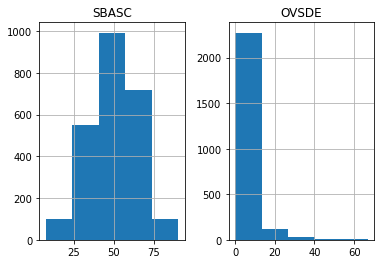

In [56]:
#Check the variables distribution - histogram

#df_social_mean_2015_2019.iloc[:,2:4].hist(bins = 5)

In [115]:
df_social_2015_2020

,CVEGEO,POB_TOT_S2015,SBASC_S2015,POB_6_16_NEB_S2015,POB_16_EBI_S2015,NO_SS_S2015,OVPT_S2015,NO_SANIT_S2015,OVSAE_S2015,NO_DREN_S2015,...,NO_ELECT_mean_15_19,NO_LAVA_var_Anual,NO_LAVA_S2019,NO_LAVA_mean_15_19,No_REFRI_var_Anual,No_REFRI_S2019,No_REFRI_mean_15_19,IRS_var_Anual,IRS_S2019,IRS_mean_15_19
0.0,01001,877190.0,2.0570,3.4786,25.6873,14.1560,0.5478,0.5543,0.6627,0.4819,...,0.185406,0.974135,12.447295,13.135097,0.956184,4.532030,4.976815,0.992490,-1.325272,-1.345557
1.0,01002,46464.0,4.4207,2.5959,41.8921,5.5355,1.6779,5.6457,1.2979,5.9887,...,0.997579,0.945375,18.719406,21.077503,0.946901,12.237405,13.729702,0.993904,-0.862559,-0.873237
2.0,01003,56048.0,4.7805,4.3906,49.1856,9.7524,1.0577,0.7756,0.9519,0.8673,...,0.612309,0.959091,13.167538,14.364769,0.944453,5.873960,6.628280,0.987243,-0.930424,-0.954940
3.0,01004,15577.0,4.3233,2.6265,33.0597,5.1165,1.5629,2.8986,0.5968,1.9324,...,0.697120,0.956970,19.352180,21.213440,0.966671,10.868471,11.657586,0.988707,-1.015491,-1.039090
4.0,01005,120405.0,3.2445,4.1297,33.7271,13.8341,0.9201,1.0273,0.9443,0.7264,...,0.439924,0.950101,12.638108,14.073904,0.916358,5.780267,6.988933,0.997419,-1.176397,-1.182509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,20407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,20427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,21138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,23011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
df_social_2015_2020["IRS_var_year"] = (df_social_2015_2020["IRS_S2020"]/df_social_2015_2020["IRS_S2020"])/6

df_social_2015_2020["IRS_2019_final"] = (df_social_2015_2020["IRS_S2015"])+(df_social_2015_2020["IRS_var_year"]*4)

df_social_2015_2020["IRS_2015_2019"] = (df_social_2015_2020["IRS_S2015"])+(df_social_2015_2020["IRS_2019_final"]/2)

In [126]:
df_social_2015_2020_f = df_social_2015_2020[["IRS_2019_final","IRS_S2015","IRS_S2020", "IRS_S2019", "IRS_2015_2019", "IRS_mean_15_19"]]
df_social_2015_2020_f.head(20)

,IRS_2019_final,IRS_S2015,IRS_S2020,IRS_S2019,IRS_2015_2019,IRS_mean_15_19
0.0,-0.699174,-1.365841,-1.315320,NaN,-1.715428,NaN
1.0,-0.217249,-0.883915,-0.857301,NaN,-0.992540,NaN
2.0,-0.312790,-0.979457,-0.918554,NaN,-1.135852,NaN
3.0,-0.396021,-1.062688,-1.004023,NaN,-1.260699,NaN
4.0,-0.521953,-1.188620,-1.173361,NaN,-1.449597,NaN
5.0,-0.530743,-1.197410,-1.168755,NaN,-1.462782,NaN
6.0,-0.465668,-1.132335,-1.065487,NaN,-1.365169,NaN
7.0,-0.324209,-0.990875,-0.956906,NaN,-1.152979,NaN
8.0,-0.290791,-0.957458,-0.900102,NaN,-1.102854,NaN
9.0,-0.109902,-0.776568,-0.829259,NaN,-0.831519,NaN
